<a href="https://colab.research.google.com/github/mansi-98/Email_spam/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMAIL-SPAM CLASSIFIER**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Categorizing given email is spam or ham
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O 
import matplotlib.pyplot as plt


In [0]:
dataset=pd.read_csv("/content/drive/My Drive/emails/emails.csv")

In [0]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [0]:
dataset.shape

(5728, 2)

In [0]:
  
# changing index cols with rename() 
# dataset.rename(columns= {"email": "text", "label":"spam"}, inplace = True) 

In [0]:
dataset.columns

Index(['text', 'spam'], dtype='object')

In [0]:
#Checking for duplicates and removing them
dataset.drop_duplicates(inplace=True)
dataset.shape 

(5695, 2)

In [0]:
#Checking for any null entries in the dataset
print (pd.DataFrame(dataset.isnull().sum()))

      0
text  0
spam  0


In [0]:
#Checking class distribution
dataset.groupby("spam").count()

,text
spam,
0,4327
1,1368


In [0]:
type(dataset['text'])

pandas.core.series.Series

In [0]:
dataset['length'] = dataset['text'].map(lambda text: len(text))
dataset['length']

0       1484
1        598
2        448
3        500
4        235
        ... 
5723    1189
5724    1167
5725    2131
5726    1060
5727    2331
Name: length, Length: 5695, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2d97657b8>,
      dtype=object)

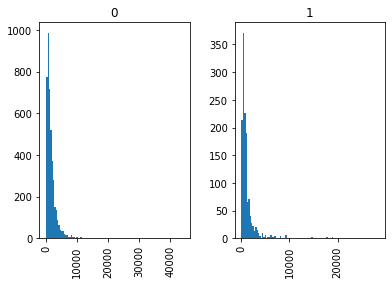

In [15]:
#Let's plot histogram for length distribution by spam
dataset.hist(column='length',by='spam',bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2d95684e0>,
      dtype=object)

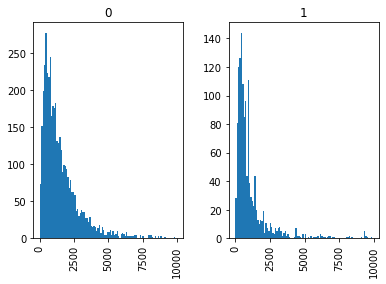

In [16]:
#we can see some extreme outliers, we'll set a threshold for text length and plot the histogram again
dataset[dataset.length < 10000].hist(column='length', by='spam', bins=100)

In [17]:
#Using Natural Language Processing to cleaning the text to make one corpus
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]

In [19]:
#Every mail starts with 'Subject :' lets remove this from each mail 
dataset['text']=dataset['text'].map(lambda text: text[8:])
dataset['text']

0        naturally irresistible your corporate identit...
1        the stock trading gunslinger  fanny is merril...
2        unbelievable new homes made easy  im wanting ...
3        4 color printing special  request additional ...
4        do not have money , get software cds from her...
                              ...                        
5723     re : research and development charges to gpg ...
5724     re : receipts from visit  jim ,  thanks again...
5725     re : enron case study update  wow ! all on th...
5726     re : interest  david ,  please , call shirley...
5727     news : aurora 5 . 2 update  aurora version 5 ...
Name: text, Length: 5695, dtype: object

In [0]:
# text=str(dataset['text'])
# type(text)

In [0]:
# for i in range(0,len(dataset)):
#   review=re.sub('[^A-Za-z0-9]+',' ',text)
#   review=review.lower()
#   review=review.split()
#   ps=PorterStemmer()
#   review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#   review=''.join(review)
#   corpus.append(review)


# corpus[1:5]

In [22]:

'''
# Implemenation of corpus using function
corpus=[]
def fun(i):
    #return (list(filter(lambda text:text not in set(stopwords.words('english')),i)))
    return list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),i)))))
corpus= dataset['text'][0:5].apply(lambda i: fun(i))
'''

"\n# Implemenation of corpus using function\ncorpus=[]\ndef fun(i):\n    #return (list(filter(lambda text:text not in set(stopwords.words('english')),i)))\n    return list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),i)))))\ncorpus= dataset['text'][0:5].apply(lambda i: fun(i))\n"

In [0]:

dataset['text'] = dataset['text'].map(lambda text:re.sub('[^A-Za-z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())


In [0]:
ps = PorterStemmer()
corpus=dataset['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [25]:
type(corpus)

pandas.core.series.Series

In [0]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = dataset.iloc[:, 1].values


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [28]:

# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train , y_train)
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[885,   9],
       [  2, 243]])

In [31]:
#this function computes subset accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100 #0.9920983318700615

99.0342405618964

In [32]:
accuracy_score(y_test, y_pred,normalize=False) #1130 out of 1139

1128

In [33]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)#array([ 0.98903509,  0.98903509,  0.99122807,  0.98026316,  0.98245614,0.98903509,  0.98901099,  0.99340659,  0.99340659,  0.98681319])
accuracies.mean()*100#0.9890254313616055

98.94640151970569

In [34]:
accuracies.std()#0.004811211283755503

0.0036473931814954997

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


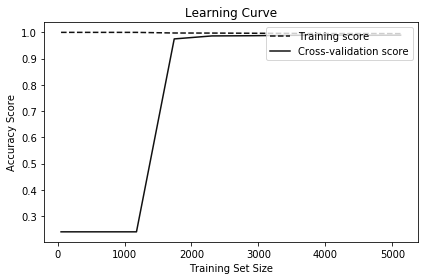

In [35]:
# Create CV training and test scores for various training set sizes
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y,cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="upper right")
plt.tight_layout()
plt.show()